In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def command_freq(t_DC, step, rst, target_freq):

    time = np.arange(0, t_DC+36000*target_freq/(step/rst)+60*60*2, 0.125, dtype=np.float32)
    freq = np.zeros(int((t_DC+36000*target_freq/(step/rst)+60*60*2)*(1/0.125)), dtype=np.float32)

    # Refactoring suggestions
    # 1. Use numpy's vectorized operations instead of loops for better performance.
    # eg. precomupte the indices and use numpy's advanced indexing
    # n_dc       = int(np.round(t_dc / sample_dt))
    # freq[:n_dc] = 0.0

    for i in range(int(t_DC*(1/0.125))): #DCの速度指令値=0rps
        freq[i] = 0.0

    for i in range(int(36000*target_freq/step)): #加速中の速度指令値
        for j in range(int(rst*(1/0.125))):
            freq[int((t_DC+i*rst)*(1/0.125)+j)] = target_freq/36000*step*(i+1)

    for i in range(int(60*60*2*(1/0.125))): #Stableの速度指令値
        freq[int((t_DC+36000*target_freq/(step/rst))*(1/0.125))+i] = target_freq

    return time, freq

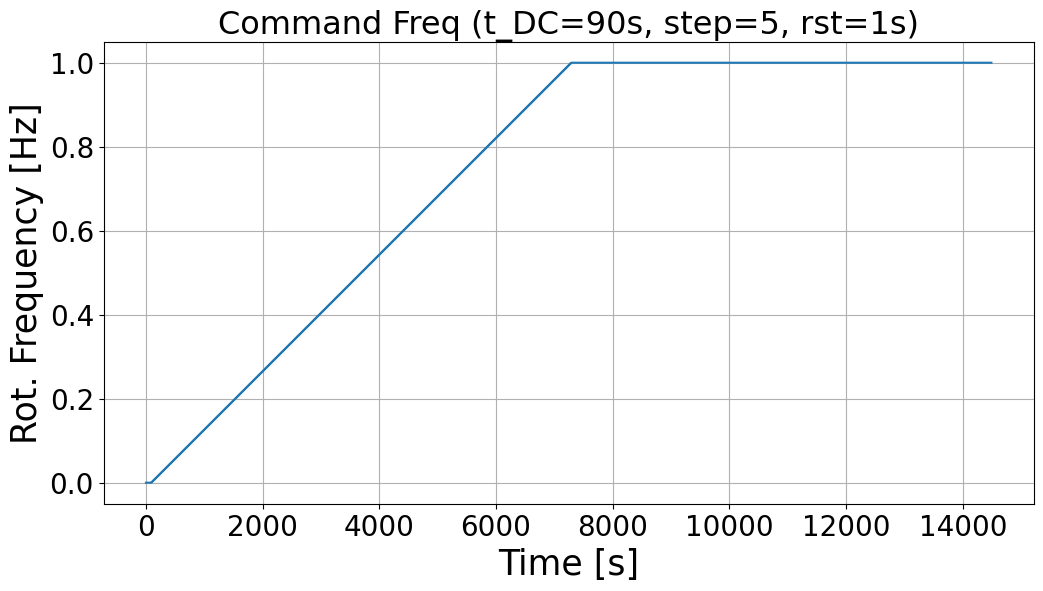

In [9]:
time = command_freq(90, 5, 1, 1)[0]
freq = command_freq(90, 5, 1, 1)[1]

fig = plt.figure(figsize = (12,6))

plt.step(time, freq, label='Command Freq [rps]')

plt.title('Command Freq (t_DC=90s, step=5, rst=1s)',fontsize=23)
plt.xlabel('Time [s]',fontsize=25)
plt.ylabel('Rot. Frequency [Hz]',fontsize=25)
plt.tick_params(labelsize = 20)
#plt.xlim(0,100)
#plt.ylim(0,0.9)
#plt.legend(fontsize=15)
plt.grid()
#print(len(B_signal_list))
plt.show()

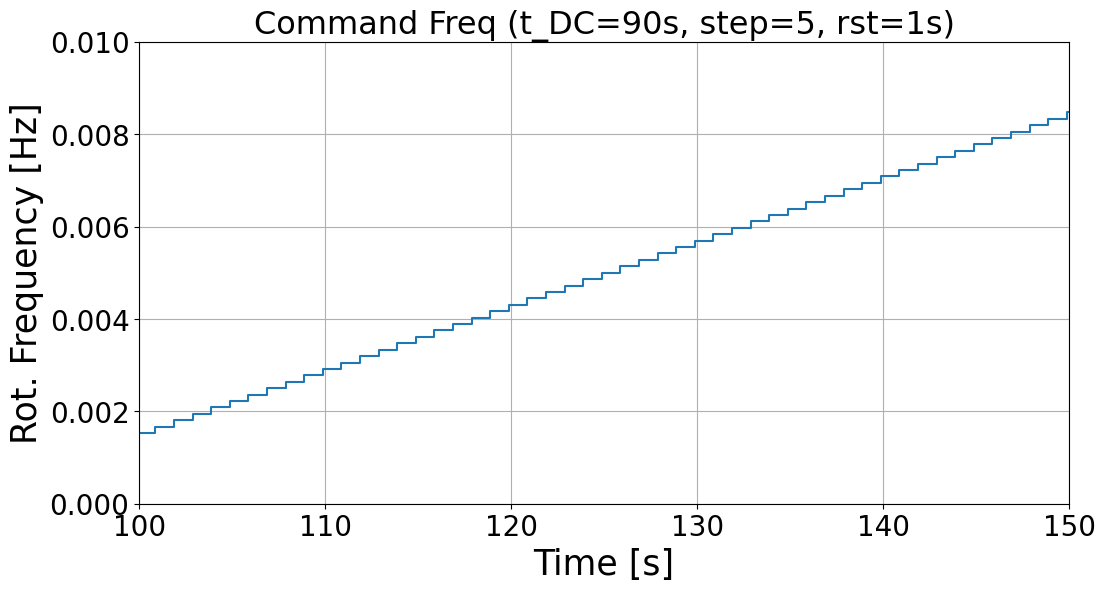

In [10]:
time = command_freq(90, 5, 1, 1)[0]
freq = command_freq(90, 5, 1, 1)[1]

fig = plt.figure(figsize = (12,6))

plt.step(time, freq, label='Command Freq [rps]')

plt.title('Command Freq (t_DC=90s, step=5, rst=1s)',fontsize=23)
plt.xlabel('Time [s]',fontsize=25)
plt.ylabel('Rot. Frequency [Hz]',fontsize=25)
plt.tick_params(labelsize = 20)
plt.xlim(100,150)
plt.ylim(0,0.01)
#plt.legend(fontsize=15)
plt.grid()
#print(len(B_signal_list))
plt.show()